<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-ignaciovaldes/blob/main/Actividad_Semanal_6_A01793262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal 6
- Ignacio Valdés Reyes
- A01793262
- Ciencia y analítica de datos
- 1 de noviembre

## 1. Descarga los datos y carga el dataset en tu libreta.

In [398]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [399]:
# Importar datos

url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

In [400]:
df = pd.read_csv(url)

## 2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [401]:
df.shape

(30000, 25)

In [402]:
df.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [403]:
df.head

<bound method NDFrame.head of           ID      X1   X2   X3   X4    X5   X6   X7   X8   X9  ...      X15  \
0          1   20000  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0  ...      0.0   
1          2  120000  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  ...   3272.0   
2          3   90000  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  ...  14331.0   
3          4   50000  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  ...  28314.0   
4          5   50000  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  ...  20940.0   
...      ...     ...  ...  ...  ...   ...  ...  ...  ...  ...  ...      ...   
29995  29996  220000  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  ...  88004.0   
29996  29997  150000  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  ...   8979.0   
29997  29998   30000  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  ...  20878.0   
29998  29999   80000  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  ...  52774.0   
29999  30000   50000  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16      X

## 3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna.

In [404]:
# Comprobar existencia de datos nulos

df.isnull().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [405]:
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [406]:
df.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [408]:
# Copiar base de datos

ndf = df.copy()

In [409]:
# Rellenar datos nulos con promedio de columna

ndf.fillna(df.mean(), inplace = True)

In [410]:
# Verificar existencia de datos nulos

ndf.isna().sum().sum()

0

## 4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión.

In [411]:
# Re-nombrar nombres de columnas

ndf.columns = ['id', 'amount', 'gender', 'education', 'marital_status', 'age', 'payment_september', 'payment_august', 'payment_july', 'payment_june', 'payment_may', 'payment_april', 'bill_september', 'bill_august', 'bill_july', 'bill_june', 'bill_may', 'bill_april', 'amount_september', 'amount_august', 'amount_july', 'amount_june', 'amount_may', 'amount_april', 'Y']

In [412]:
# Verificar nombres de columnas

ndf.columns

Index(['id', 'amount', 'gender', 'education', 'marital_status', 'age',
       'payment_september', 'payment_august', 'payment_july', 'payment_june',
       'payment_may', 'payment_april', 'bill_september', 'bill_august',
       'bill_july', 'bill_june', 'bill_may', 'bill_april', 'amount_september',
       'amount_august', 'amount_july', 'amount_june', 'amount_may',
       'amount_april', 'Y'],
      dtype='object')

In [413]:
# Calcular estadística descritiva

ndf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
amount,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
gender,30000.0,1.603753,0.489117,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853057,0.790293,0.0,1.00,2.0,2.00,6.0
marital_status,30000.0,1.551903,0.521950,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.484214,9.217256,21.0,28.00,34.0,41.00,79.0
payment_september,30000.0,-0.016635,1.123773,-2.0,-1.00,0.0,0.00,8.0
payment_august,30000.0,-0.133689,1.197154,-2.0,-1.00,0.0,0.00,8.0
payment_july,30000.0,-0.166405,1.195908,-2.0,-1.00,0.0,0.00,8.0
payment_june,30000.0,-0.220800,1.168977,-2.0,-1.00,0.0,0.00,8.0


In [414]:
# Revisar correlación

ndf.corr()

,id,amount,gender,education,marital_status,age,payment_september,payment_august,payment_july,payment_june,...,bill_june,bill_may,bill_april,amount_september,amount_august,amount_july,amount_june,amount_may,amount_april,Y
id,1.000000,0.026179,0.018542,0.039176,-0.029078,0.018813,-0.030513,-0.011125,-0.018503,-0.002712,...,0.040443,0.016851,0.016829,0.009644,0.008442,0.039118,0.007803,0.000651,0.002996,-0.014048
amount,0.026179,1.000000,0.024744,-0.219111,-0.108191,0.144662,-0.271256,-0.296438,-0.286222,-0.267354,...,0.293963,0.295510,0.290403,0.195268,0.178396,0.210101,0.203205,0.217124,0.219573,-0.153500
gender,0.018542,0.024744,1.000000,0.014353,-0.031478,-0.090855,-0.057717,-0.070855,-0.065939,-0.060043,...,-0.022023,-0.017163,-0.016890,-0.000179,-0.001427,-0.008579,-0.002266,-0.001688,-0.002781,-0.039917
education,0.039176,-0.219111,0.014353,1.000000,-0.143377,0.175036,0.105384,0.121585,0.114087,0.108859,...,-0.000427,-0.007543,-0.009107,-0.037463,-0.030022,-0.039942,-0.038270,-0.040335,-0.037180,0.028136
marital_status,-0.029078,-0.108191,-0.031478,-0.143377,1.000000,-0.414161,0.019913,0.024217,0.032541,0.032999,...,-0.023394,-0.025459,-0.021308,-0.005912,-0.008129,-0.003515,-0.012649,-0.001205,-0.006675,-0.024317
age,0.018813,0.144662,-0.090855,0.175036,-0.414161,1.000000,-0.039441,-0.050164,-0.053053,-0.049725,...,0.051431,0.049384,0.047698,0.025969,0.021791,0.029219,0.021354,0.022777,0.019507,0.013838
payment_september,-0.030513,-0.271256,-0.057717,0.105384,0.019913,-0.039441,1.000000,0.672136,0.574453,0.538831,...,0.179108,0.180644,0.177017,-0.079228,-0.070096,-0.070451,-0.063949,-0.058132,-0.058661,0.324713
payment_august,-0.011125,-0.296438,-0.070855,0.121585,0.024217,-0.050164,0.672136,1.000000,0.766729,0.662073,...,0.222201,0.221296,0.219331,-0.080685,-0.058992,-0.055816,-0.046845,-0.037031,-0.036494,0.263522
payment_july,-0.018503,-0.286222,-0.065939,0.114087,0.032541,-0.053053,0.574453,0.766729,1.000000,0.776577,...,0.227433,0.225380,0.222487,0.001225,-0.066773,-0.053260,-0.045990,-0.035772,-0.035832,0.235526
payment_june,-0.002712,-0.267354,-0.060043,0.108859,0.032999,-0.049725,0.538831,0.662073,0.776577,1.000000,...,0.246010,0.242939,0.239156,-0.009325,-0.001923,-0.069175,-0.043422,-0.033588,-0.026529,0.216454


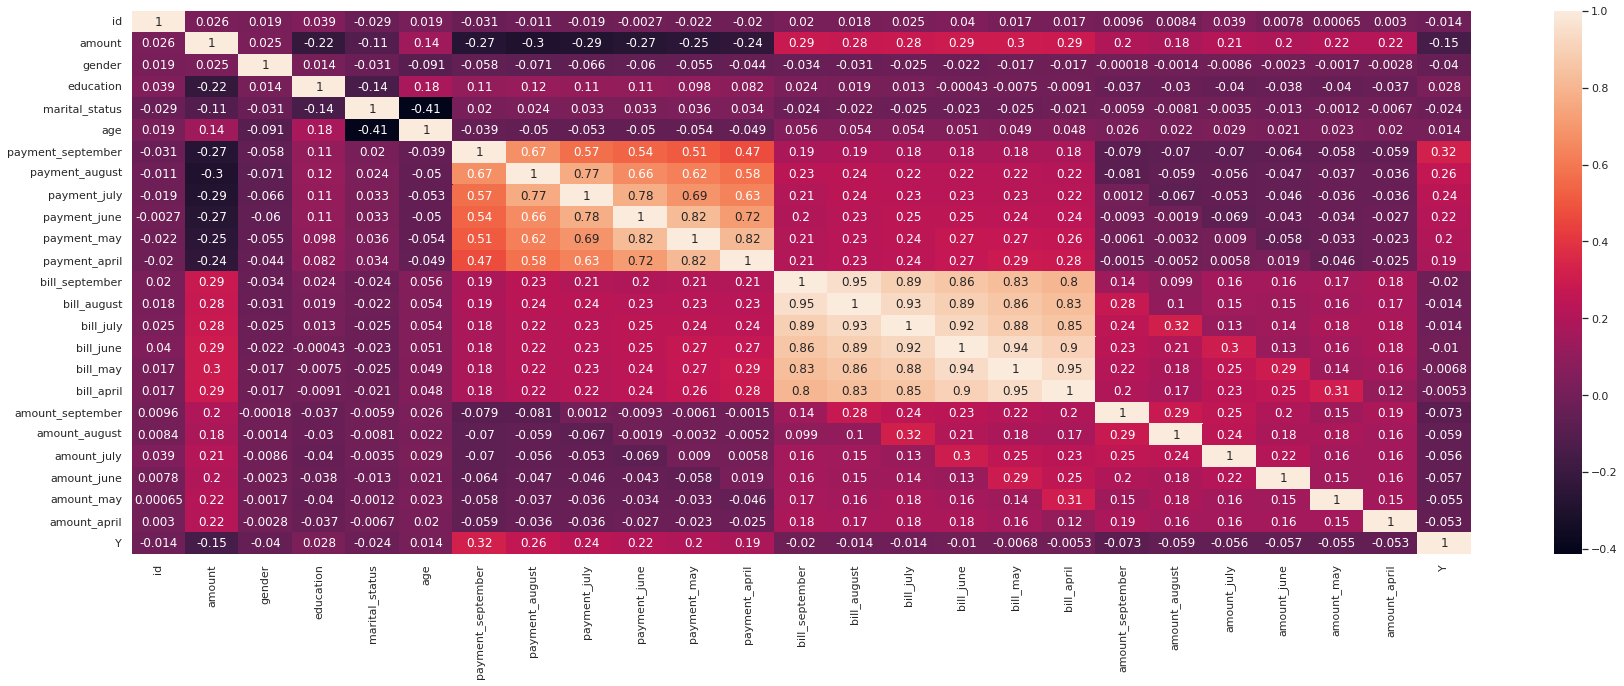

In [415]:
sns.set(rc = {'figure.figsize' : (30, 10)})
sns.heatmap(ndf.corr(), annot = True)
plt.show()

## 5. Realiza el conteo de las variables categóricas.

In [416]:
# Eliminar variables que no son categorícas

cat_vars = ndf.copy()
cat_vars = cat_vars.drop(columns = ['id', 'amount', 'age', 'payment_september', 'payment_august', 'payment_july', 'payment_june', 'payment_may', 'payment_april', 'bill_september', 'bill_august', 'bill_july', 'bill_june', 'bill_may', 'bill_april', 'amount_september', 'amount_august', 'amount_july', 'amount_june', 'amount_may', 'amount_april', 'Y'])
cat_vars

,gender,education,marital_status
0,2.0,2.0,1.0
1,2.0,2.0,2.0
2,2.0,2.0,2.0
3,2.0,2.0,1.0
4,1.0,2.0,1.0
...,...,...,...
29995,1.0,3.0,1.0
29996,1.0,3.0,2.0
29997,1.0,2.0,2.0
29998,1.0,3.0,1.0


In [417]:
# Contar variables categóricas

cat_vars.value_counts()

gender    education  marital_status
2.000000  2.000000   1.000000          4472
          1.000000   2.000000          4176
          2.000000   2.000000          4080
1.000000  2.000000   2.000000          2940
          1.000000   2.000000          2633
          2.000000   1.000000          2370
2.000000  1.000000   1.000000          2032
          3.000000   1.000000          1813
1.000000  1.000000   1.000000          1690
          3.000000   1.000000          1046
2.000000  3.000000   2.000000          1015
1.000000  3.000000   2.000000           894
2.000000  5.000000   1.000000           102
          2.000000   3.000000            99
          5.000000   2.000000            81
          3.000000   3.000000            67
1.000000  2.000000   3.000000            63
          5.000000   1.000000            48
                     2.000000            46
2.000000  4.000000   2.000000            45
1.000000  3.000000   3.000000            36
2.000000  4.000000   1.000000           

## 6. Escala los datos, si consideras necesario.

In [418]:
# Eliminar variables categóricas para PCA

ndf = ndf.drop(columns = ['id', 'gender', 'education', 'marital_status'])
ndf

,amount,age,payment_september,payment_august,payment_july,payment_june,payment_may,payment_april,bill_september,bill_august,...,bill_june,bill_may,bill_april,amount_september,amount_august,amount_july,amount_june,amount_may,amount_april,Y
0,20000,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,150000,43.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1683.0,1828.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,30000,37.0,4.0,3.0,2.0,-1.0,0.0,0.0,3565.0,3356.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,80000,41.0,1.0,-1.0,0.0,0.0,0.0,-1.0,-1645.0,78379.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


In [419]:
# Escalar datos

StandardScaler().fit_transform(ndf)

array([[-1.13672015, -1.24596794,  1.79455183, ..., -0.31420111,
        -0.2934263 ,  1.87653324],
       [-0.3659805 , -1.02898001, -0.87507133, ..., -0.31420111,
        -0.18092182,  1.87653324],
       [-0.59720239, -0.16102827,  0.01480306, ..., -0.2487466 ,
        -0.01216511, -0.53295086],
       ...,
       [-1.05964618,  0.16445363,  3.5743006 , ..., -0.18329209,
        -0.11904436,  1.87653324],
       [-0.67427636,  0.5984295 ,  0.90467744, ...,  3.15253166,
        -0.19194726,  1.87653324],
       [-0.90549825,  1.14089934,  0.01480306, ..., -0.2487466 ,
        -0.23717406,  1.87653324]])

## 7. Reduce las dimensiones con PCA, si consideras necesario.
  - Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%.
  - Indica la importancia de las variables en cada componente.

In [420]:
ndf_variance = PCA()
ndf_variance.fit(ndf.iloc[:, 0:].dropna(axis = 0))
ndf_varianceSummary = pd.DataFrame({
    'Proportion of variance' : ndf_variance.explained_variance_ratio_,
    'Cumsum of variance' : np.cumsum(ndf_variance.explained_variance_ratio_)
})
ndf_varianceSummary

,Proportion of variance,Cumsum of variance
0,6.104230e-01,0.610423
1,2.953625e-01,0.905786
2,3.052475e-02,0.936310
3,1.692949e-02,0.953240
4,9.421275e-03,0.962661
5,9.042387e-03,0.971703
6,7.544473e-03,0.979248
7,6.384953e-03,0.985633
8,5.837410e-03,0.991470
9,2.967055e-03,0.994437


## 8. Elabora los histogramas de los atributos para visualizar su distribución.

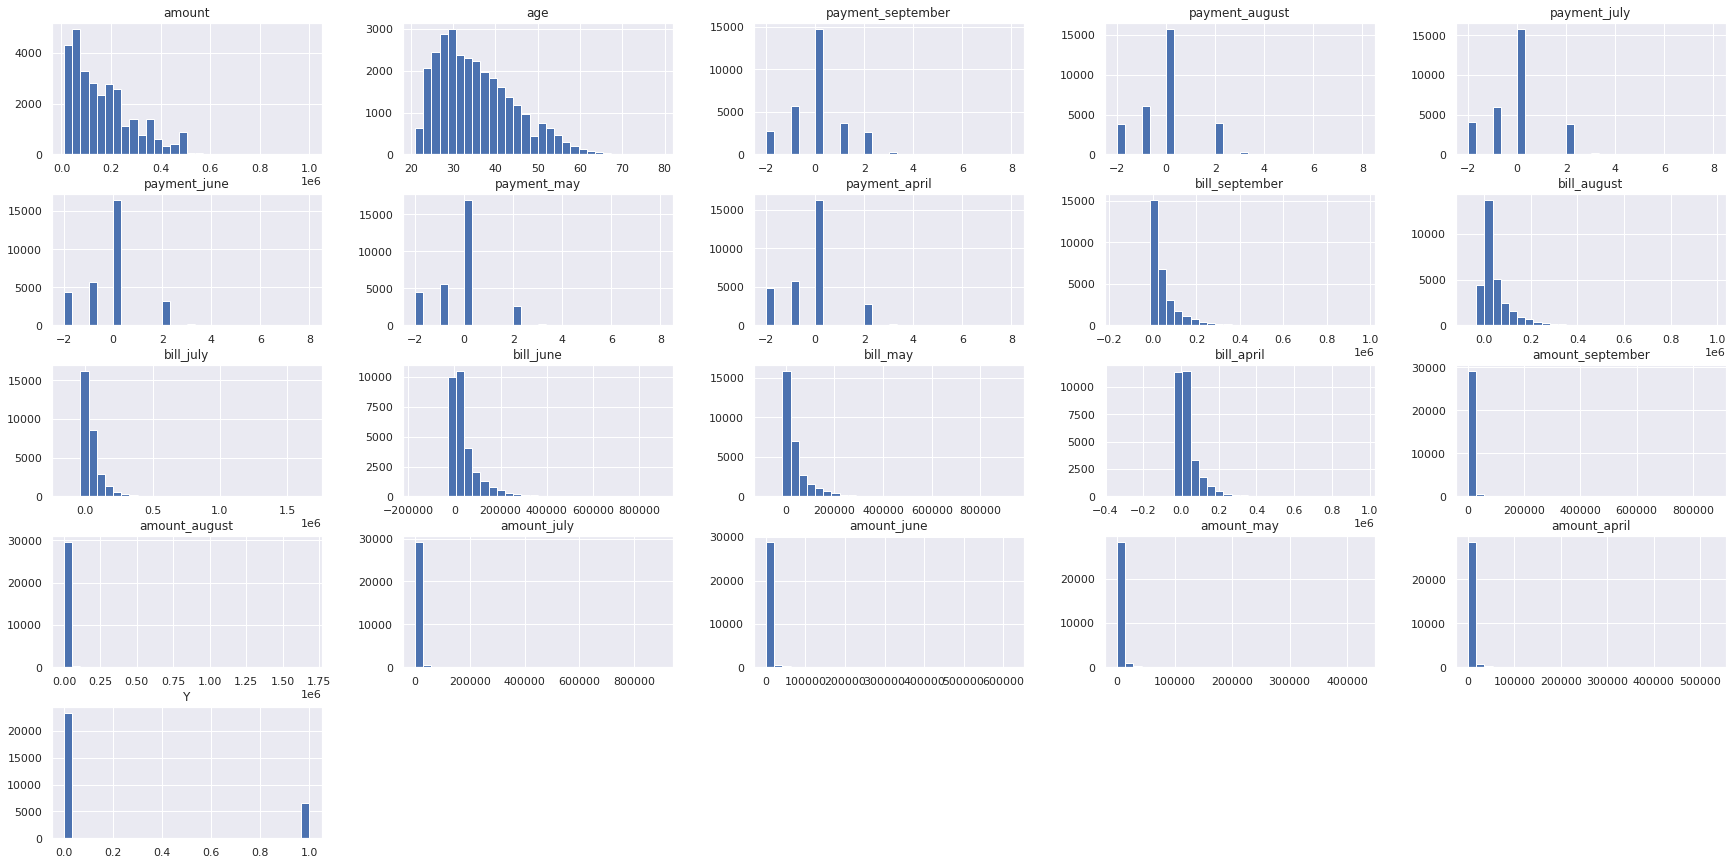

In [421]:
ndf.hist(bins = 30, figsize = (30, 15))
plt.show()

## 9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.

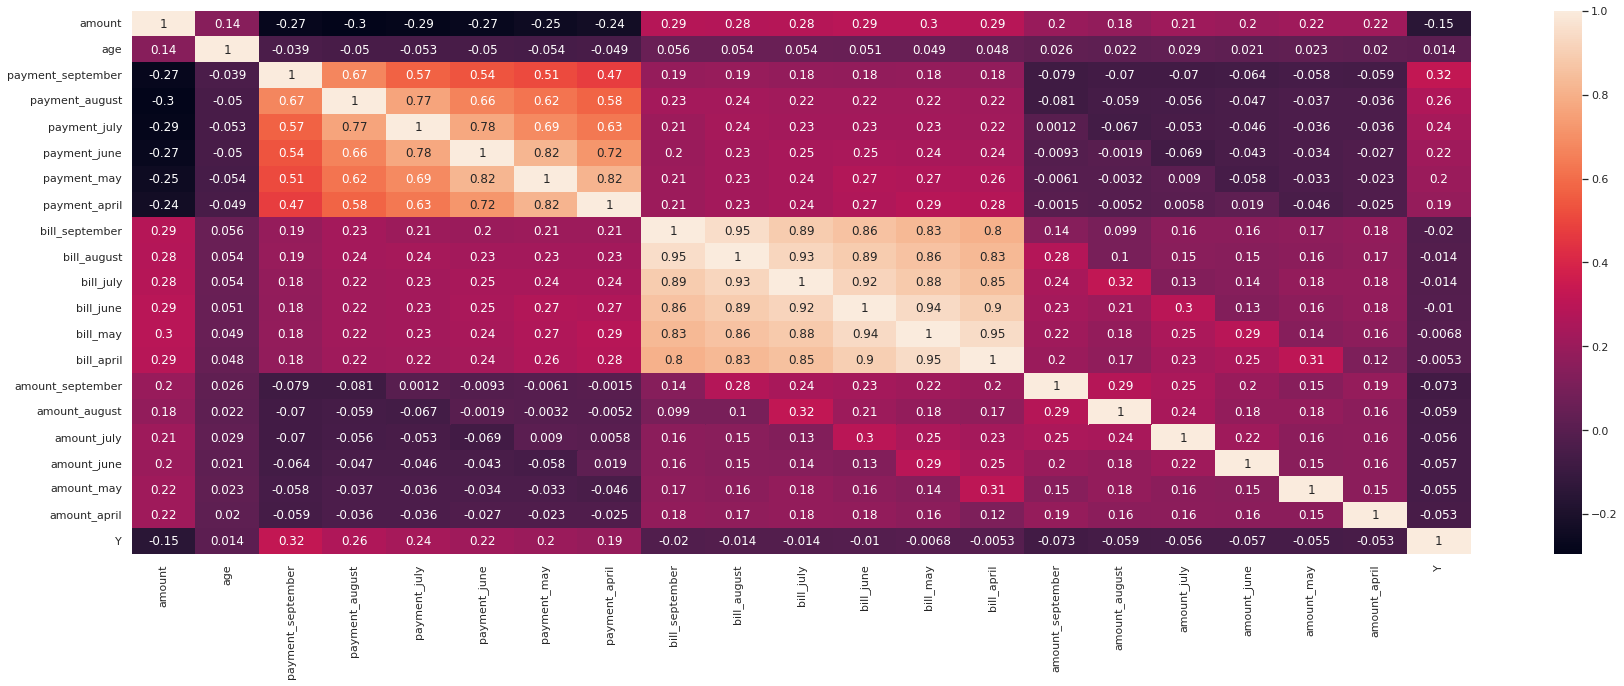

In [428]:
sns.set(rc = {'figure.figsize' : (30, 10)})
sns.heatmap(ndf.corr(), annot = True)
plt.show()

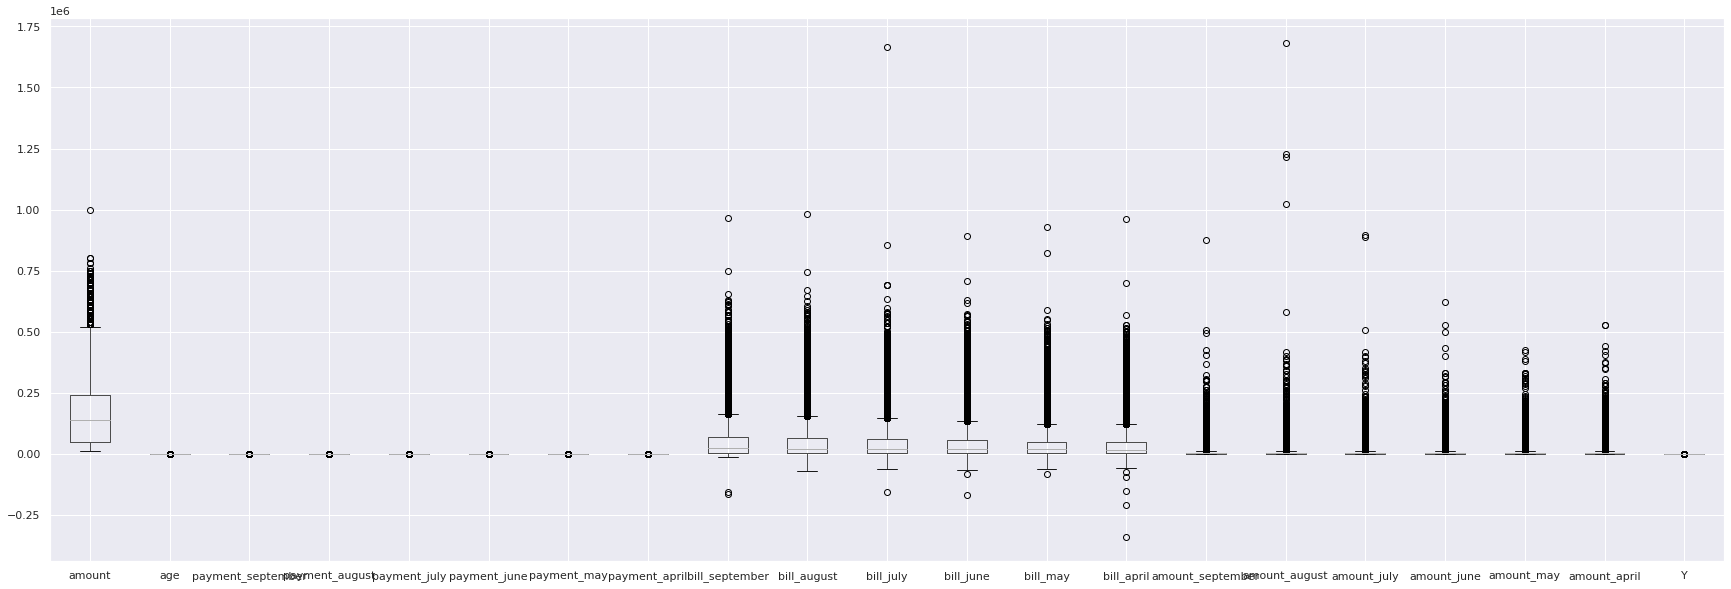

In [427]:
ndf.boxplot(figsize = (30, 10))
plt.show()

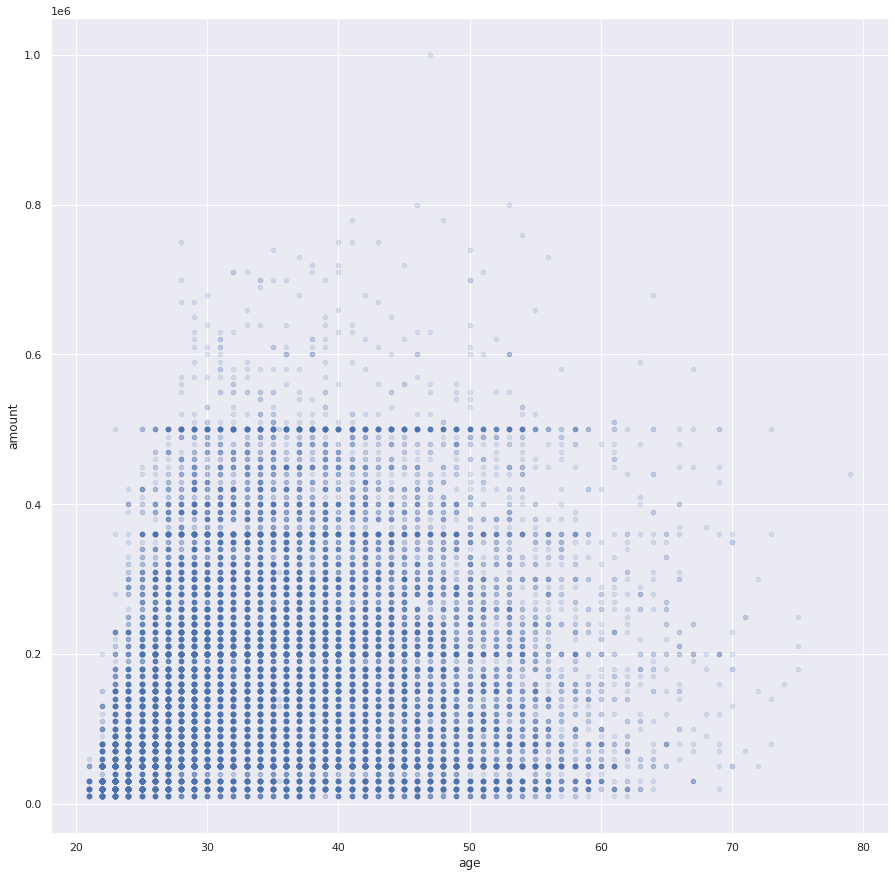

In [439]:
ndf.plot.scatter(x = 'age', y = 'amount', figsize = (15, 15), alpha = 0.15)
plt.show()

## 10. Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

De acuerdo al orden de los gráficos:


*   Hay una gran dispersión entre las variables.
*   Existen datos atípicos en las variables.
*   Se identifican algunos patrones entre las variables 'age' y 'amount'.

